<a href="https://colab.research.google.com/github/jackhegarty3/Data201-Fall2025/blob/main/DATA201_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Final Project: Decision Tree**

Viktoriia Lyon, Jack Hegarty, Arash Kamangir

Professor Abdirisak Mohamed

DATA 201

December 18, 2025

**Introduction**

The dataset used in this project is the Adult Census Income dataset, which originates from the 1994 U.S. Census Bureau Current Population Survey (CPS). The dataset is publicly available through the UCI Machine Learning Repository and is widely used in academic research and education for studying socioeconomic patterns and classification methods.

This dataset contains information about approximately 45,000 individuals after data cleaning and includes demographic, educational, and employment-related variables. The features describe characteristics such as age, education level, occupation, marital status, hours worked per week, capital gains and losses, and country of origin. The target variable indicates whether an individual earns more than $50,000 per year.

The goal of this project is to use a Decision Tree classification model to predict income category (≤ $50K or > $50K) based on these attributes. This task is well-suited for decision trees because the dataset contains a mix of numerical and categorical variables, and the relationships between predictors and income are not strictly linear.

This dataset was chosen because it represents real-world census data, includes realistic data quality challenges such as missing values and categorical variables, and allows meaningful interpretation of results. Although the data was collected in 1994 and does not reflect modern income thresholds, it remains valuable for understanding structural relationships between education, work experience, and income. The purpose of this analysis is not to predict current salaries, but to demonstrate data preparation, exploratory data analysis, model training, and interpretation using real socioeconomic data.

**Research Questions**:

Can income category be predicted using demographic and employment information?

Which features contribute most to income prediction?

How well does a Decision Tree model perform on this classification task?

In [ ]:
import pandas as pd
import numpy as np

# Column names from UCI documentation
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]

# Load training and test data
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

train = pd.read_csv(train_url, names=columns, sep=", ", engine="python")
test = pd.read_csv(test_url, names=columns, sep=", ", skiprows=1, engine="python")

# Combine into one dataset
df = pd.concat([train, test], ignore_index=True)

df.shape


(48842, 15)

In [ ]:
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df["income"].value_counts()


,count
income,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


Data Cleaning

The dataset contains real-world inconsistencies. In particular, the income variable includes trailing periods (e.g., >50K.) in some records due to differences between training and test files. These inconsistencies were cleaned to ensure a consistent binary target variable for classification.

In [ ]:
# Remove trailing dots and extra spaces
df["income"] = df["income"].str.replace(".", "", regex=False)
df["income"] = df["income"].str.strip()

# Check the result
df["income"].value_counts()


,count
income,
<=50K,37155
>50K,11687


In [ ]:
# Encode income as binary
df["income"] = df["income"].map({">50K": 1, "<=50K": 0})

df["income"].value_counts()


,count
income,
0,37155
1,11687


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [ ]:
df.isna().sum().sort_values(ascending=False)


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
(df == "?").sum().sort_values(ascending=False)


,0
occupation,2809
workclass,2799
native_country,857
fnlwgt,0
education,0
education_num,0
age,0
marital_status,0
relationship,0
sex,0


In [ ]:
# Replace '?' with NaN
df = df.replace("?", np.nan)

# Check missing values again
df.isna().sum().sort_values(ascending=False)


,0
occupation,2809
workclass,2799
native_country,857
fnlwgt,0
education,0
education_num,0
age,0
marital_status,0
relationship,0
sex,0


In [ ]:
# Drop rows with missing values
df = df.dropna()

# Check shape after cleaning
df.shape


(45222, 15)

In [ ]:
df.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


Income Distribution (Target Variable)

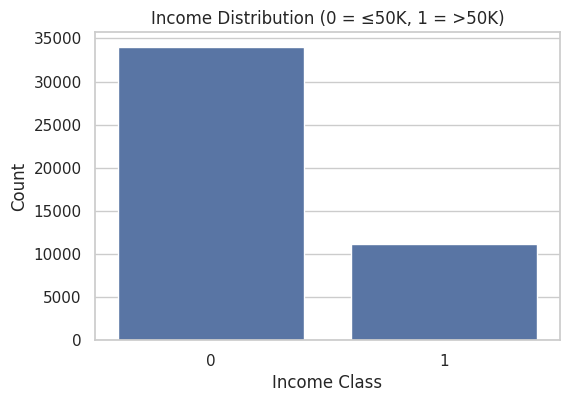

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="income", data=df)
plt.title("Income Distribution (0 = ≤50K, 1 = >50K)")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()


The majority of individuals in the dataset earn $50,000 or less per year. This indicates a moderate class imbalance, which is common in real-world income data.

Age VS Income

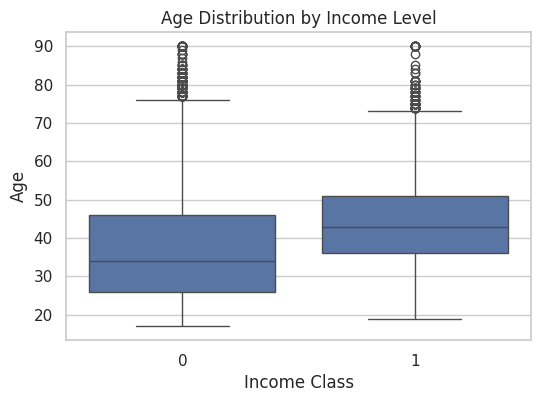

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="income", y="age", data=df)
plt.title("Age Distribution by Income Level")
plt.xlabel("Income Class")
plt.ylabel("Age")
plt.show()


Individuals earning more than $50,000 tend to be older on average, suggesting that income increases with age and experience.

Education Level vs Income

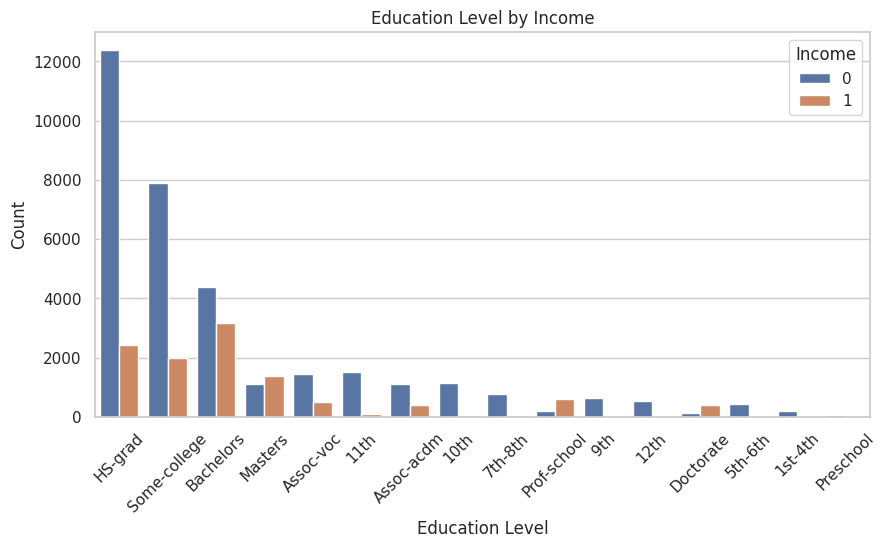

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="education", hue="income", data=df,
              order=df["education"].value_counts().index)
plt.title("Education Level by Income")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.show()


Education level shows a strong relationship with income. Individuals with lower education levels are much more likely to earn $50,000 or less, while those with bachelor’s degrees and higher education levels have a substantially higher likelihood of earning more than $50,000. This suggests that education is a key factor in income prediction and is well-suited for use in a Decision Tree model.

Hours Worked per Week vs Income

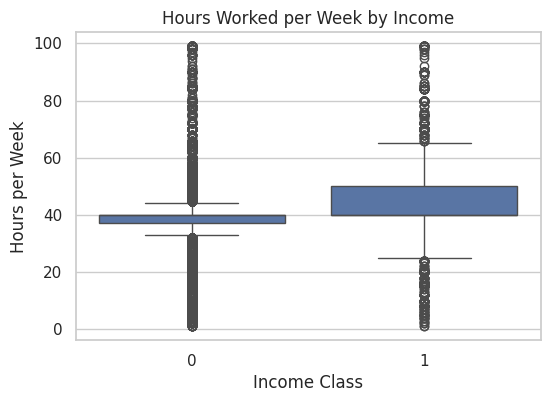

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="income", y="hours_per_week", data=df)
plt.title("Hours Worked per Week by Income")
plt.xlabel("Income Class")
plt.ylabel("Hours per Week")
plt.show()


Individuals earning more than $50,000 generally work more hours per week on average. However, the overlap between the two groups indicates that hours worked alone does not fully determine income level.

Correlation Heatmap

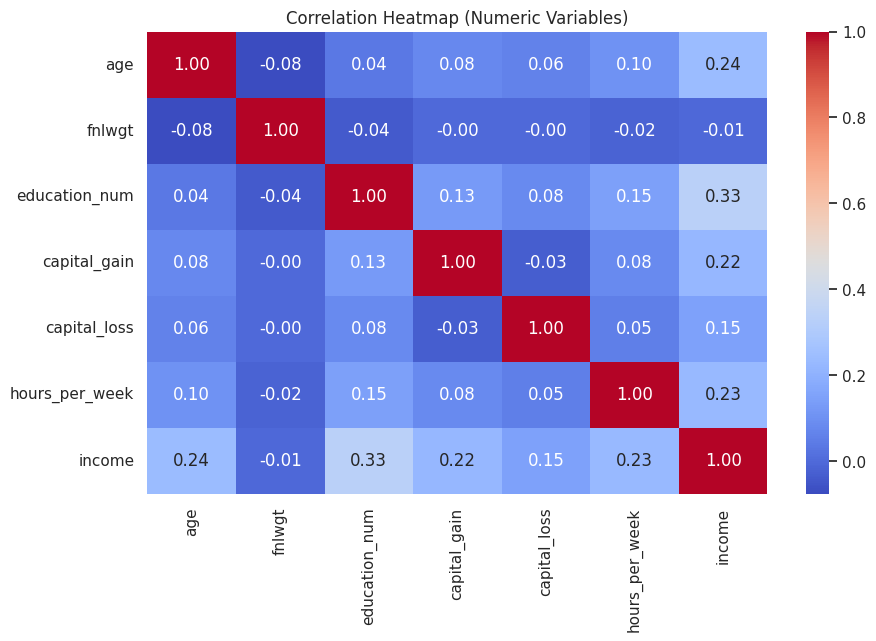

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(),
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


The correlation heatmap shows that education level, age, hours worked per week, and capital gain have the strongest positive relationships with income. Education exhibits the highest correlation with income, reinforcing earlier findings from the education-level analysis. Other numeric variables show weaker correlations, indicating that income prediction requires a combination of multiple features rather than reliance on a single variable.

Correlation ≠ importance in Decision Trees

Heatmap shows linear relationships

Decision Trees find non-linear splits

A variable with low correlation can still be important

This is why:

Heatmap is for intuition

Tree decides final importance

**Define features and target**

In [ ]:
# X contains all predictor variables
X = df.drop(columns="income")

# y is the target variable (0 = ≤50K, 1 = >50K)
y = df["income"]



In [ ]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
# stratify=y keeps income proportions the same in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [ ]:
# Categorical columns (text data)
cat_cols = X.select_dtypes(include="object").columns

# Numerical columns (numeric data)
num_cols = X.select_dtypes(include="number").columns

ncode categorical variables

Decision Trees cannot work with text categories directly.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
# Pass numerical variables without change
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)


**Build the Decision Tree model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Create a Decision Tree classifier
# max_depth limits tree size to prevent overfitting
model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

# Combine preprocessing and model into one pipeline
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", model)
    ]
)


In [ ]:
# Train the Decision Tree using training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object'))])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict income classes (0 or 1)
y_pred = pipeline.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8449972360420122

In [ ]:
# Display precision, recall, and F1-score
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6803
           1       0.76      0.55      0.64      2242

    accuracy                           0.84      9045
   macro avg       0.81      0.75      0.77      9045
weighted avg       0.84      0.84      0.84      9045



In [ ]:
# Predict probabilities for each class
# Column 0 → probability of income ≤50K
# Column 1 → probability of income >50K
y_proba = pipeline.predict_proba(X_test)

# Display first 5 probability predictions
y_proba[:5]


array([[0.97902685, 0.02097315],
       [0.        , 1.        ],
       [0.97902685, 0.02097315],
       [0.68164358, 0.31835642],
       [0.97902685, 0.02097315]])

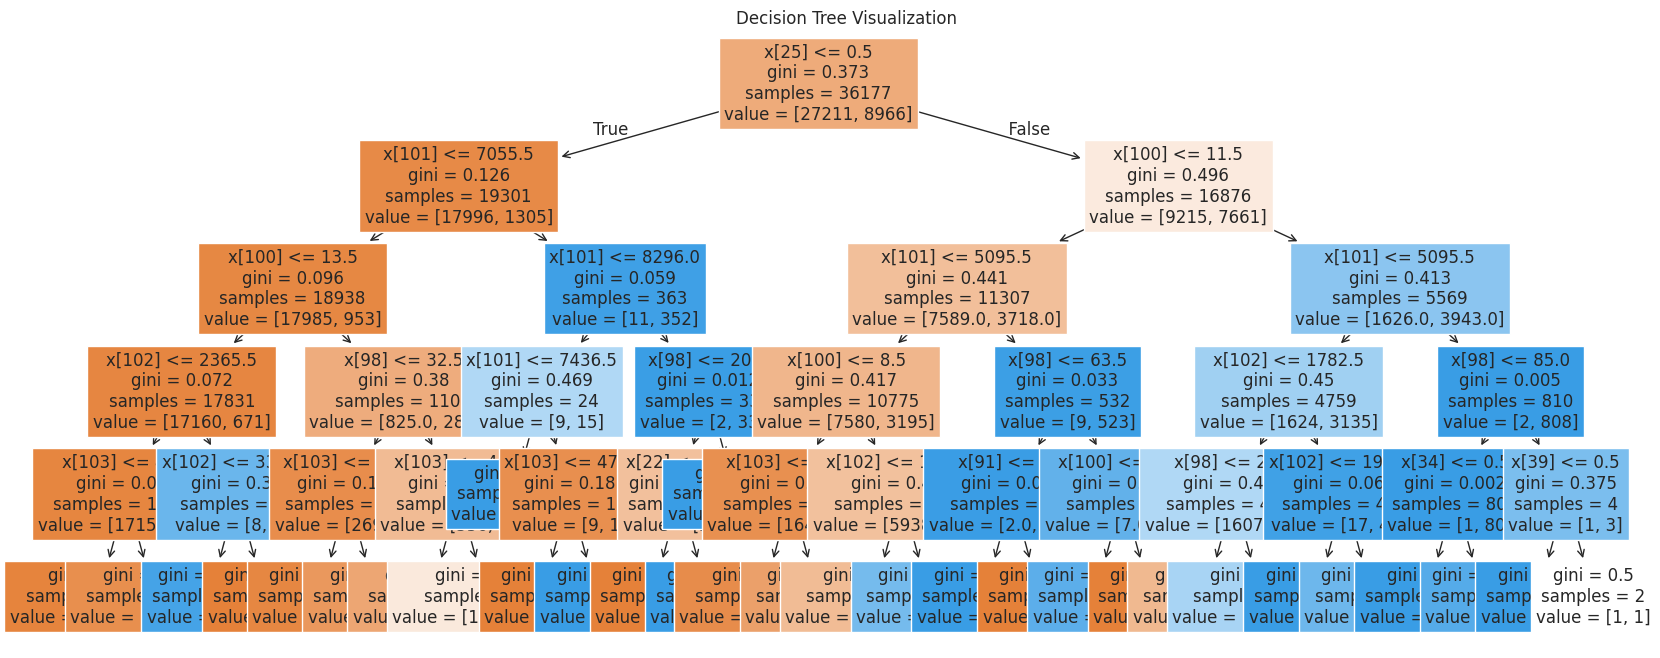

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Extract the trained decision tree model
trained_tree = pipeline.named_steps["classifier"]

# Plot  of the tree for readability
plt.figure(figsize=(20,8))
tree.plot_tree(
    trained_tree,
    filled=True,
    fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()


Feature importance measures how much each feature contributed to the model’s decisions, averaged across all splits in the tree.

In [ ]:

# Get feature names after one-hot encoding
ohe = pipeline.named_steps["preprocessing"].named_transformers_["cat"]
encoded_cat_names = ohe.get_feature_names_out(cat_cols)

# Combine numeric + encoded categorical feature names (must match preprocessing order)
feature_names = np.concatenate([encoded_cat_names, num_cols])

# Get trained tree
trained_tree = pipeline.named_steps["classifier"]

# Create importance table
importances = pd.Series(trained_tree.feature_importances_, index=feature_names)
top10 = importances.sort_values(ascending=False).head(10)

top10


,0
marital_status_Married-civ-spouse,0.470105
education_num,0.233821
capital_gain,0.219414
capital_loss,0.052310
age,0.012575
hours_per_week,0.011063
native_country_South,0.000348
education_Some-college,0.000233
occupation_Prof-specialty,0.000087
occupation_Farming-fishing,0.000043


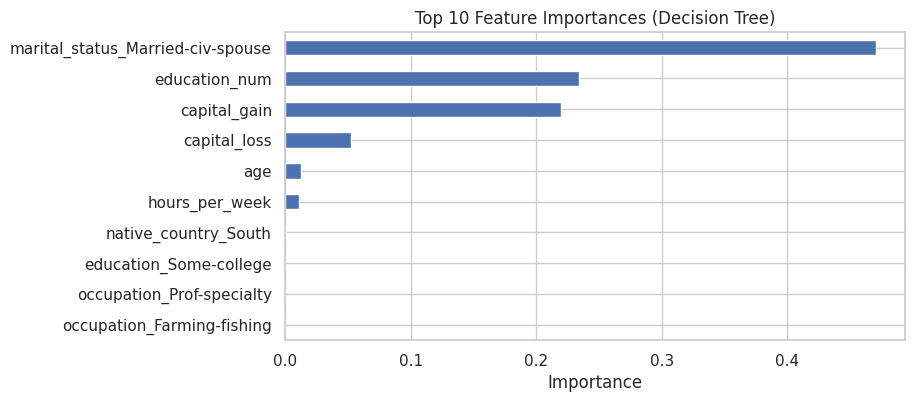

In [ ]:
top10.sort_values().plot(kind="barh", figsize=(8,4))
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.show()


In [ ]:
# Number of features after preprocessing
pipeline.named_steps["preprocessing"].get_feature_names_out().shape


(104,)

In [ ]:
feature_names = pipeline.named_steps["preprocessing"].get_feature_names_out()
feature_names[:20]   # show first 20


array(['cat__workclass_Federal-gov', 'cat__workclass_Local-gov',
       'cat__workclass_Private', 'cat__workclass_Self-emp-inc',
       'cat__workclass_Self-emp-not-inc', 'cat__workclass_State-gov',
       'cat__workclass_Without-pay', 'cat__education_10th',
       'cat__education_11th', 'cat__education_12th',
       'cat__education_1st-4th', 'cat__education_5th-6th',
       'cat__education_7th-8th', 'cat__education_9th',
       'cat__education_Assoc-acdm', 'cat__education_Assoc-voc',
       'cat__education_Bachelors', 'cat__education_Doctorate',
       'cat__education_HS-grad', 'cat__education_Masters'], dtype=object)

All predictor variables except the target income variable were used in the model. Numerical features were included directly, while categorical variables were transformed using one-hot encoding. This process converted each category into a binary indicator, allowing the Decision Tree algorithm to perform meaningful yes/no splits on categorical information.

**Conclusion**

In this project, a Decision Tree classification model was developed to predict whether an individual earns more than $50,000 per year using demographic and employment data from the Adult Census Income dataset. The analysis involved data cleaning, exploratory data analysis, feature encoding, model training, and evaluation using real census data.

The Decision Tree model achieved an accuracy of approximately 84.5% on the test dataset. The model performed particularly well in identifying individuals earning $50,000 or less, while performance was weaker for identifying higher-income individuals. This imbalance is likely due to the unequal distribution of income classes in the dataset and the overlapping characteristics between income groups. Despite this limitation, the model successfully captured meaningful patterns in the data.

Exploratory data analysis revealed that education level, age, hours worked per week, and capital gains are among the most influential factors associated with higher income. These findings were consistent with the structure of the trained Decision Tree, whose early splits reflected similar variables. Importantly, no single feature was sufficient to determine income on its own, highlighting the multifactor nature of income prediction.

Although the dataset is based on data collected in 1994 and does not reflect current income thresholds or labor market conditions, the relationships identified in this analysis remain relevant. The project demonstrates that education, work experience, and labor participation play a significant role in income outcomes, both historically and in modern contexts.

Overall, this project illustrates how Decision Tree models can be applied to real-world data to uncover interpretable decision rules and provide insights into complex socioeconomic phenomena. The results emphasize the importance of careful data preparation, thoughtful model interpretation, and awareness of dataset limitations when applying machine learning techniques.